In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import os
import math

In [2]:
# importing elpileptic and healthy data
def load_csv_files(directory):
    all_df = []    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            all_df.append(df)
    
    combined_df = pd.concat(all_df, ignore_index=True)   
    return combined_df

epi_directory = '/kaggle/input/epileptic'
healthy_directory = '/kaggle/input/healthy'

# loading epileptical data 
epi_data = load_csv_files(epi_directory)
# loading healthy data
heal_data = load_csv_files(healthy_directory)

In [3]:
epi_data.shape, heal_data.shape

((1844925, 19), (1207161, 19))

In [4]:
# converting the dataframe into 2-D numpy-array
epi_data = np.asarray(epi_data.T)
heal_data = np.asarray(heal_data.T)

In [5]:
epi_data.shape, heal_data.shape

((19, 1844925), (19, 1207161))

### Resampling

In [6]:
epi_resample_data = np.zeros_like(heal_data)
for i in np.arange(0, 19):
    epi_resample_data[i] = epi_data[i][ : 1207161]

### Feautre : Mean

In [7]:
"""
	Definition : Returns the mean value of each signal for the specified group size
	Parameters:
		1D array : 1D array containing the values of a signal of a single channel
	Returns:
		numpy.ndarray : 1D array containing the means of each group of specific channel from the input 1D array
"""
group_size = 125
def group_mean_of_specific_channel(data): 
    num_groups = data.size // group_size
    remaining_elements = data.size % group_size
    last_group = data[num_groups * group_size:]
    groups = np.split(data[0 : num_groups * group_size], num_groups)
#     groups.append(last_group)
    means = [group.mean() for group in groups]    
    return means

### Feautres are of ndarray form

In [8]:
# initliasing the feautre vector
epi_mean_feautre = []
health_mean_feautre = []
# for first channel only
for i in range(0, 19):
    # converting data to numpy arrays
    epi_data_channel = epi_resample_data[i]
    health_data_channel = heal_data[i]
    # storing mean feautre vector for all patients channel-wise
    epi_mean_feautre.append(group_mean_of_specific_channel(epi_data_channel))
    health_mean_feautre.append(group_mean_of_specific_channel(health_data_channel))
            
epi_mean_data = np.array(epi_mean_feautre)
health_mean_data = np.array(health_mean_feautre)

In [ ]:
# max and min of a epi and healthy feautre vector
# maxi = np.max([np.max(health_mean_data), np.max(epi_mean_data)])
# mini = np.min([np.min(health_mean_data), np.min(epi_mean_data)])
# step_size = (maxi - mini)/9657
# plotting_axis = np.arange(mini, maxi, step_size)

In [9]:
np.max(health_mean_data), np.min(health_mean_data)

(5.695481416523762e-06, -6.2582207815466975e-06)

In [10]:
np.max(epi_mean_data), np.min(epi_mean_data)

(2.8709935372714778e-05, -2.9238432195140757e-05)

In [42]:
epi_mean_data.shape, health_mean_data.shape

((19, 9657), (19, 9657))

In [10]:
he_obs = np.concatenate(epi_mean_data)
epi_obs = np.concatenate(health_mean_data)

mean_he_obs = np.mean(he_obs)
mean_epi_obs = np.std(epi_obs)

s_d_he_obs = np.mean(he_obs)
s_d_epi_obs = np.std(epi_obs)

# 12th MAY : without Log of feautre vector

In [11]:
# h0 - healthy
# h1 - epiletical

p_h0 = (1/np.sqrt(2*np.pi*s_d_he_obs))*np.exp(-0.5*((he_obs - mean_he_obs)/s_d_he_obs)**2)
p_h1 = (1/np.sqrt(2*np.pi*s_d_epi_obs))*np.exp(-0.5*((epi_obs - mean_epi_obs)/s_d_epi_obs)**2)

#plt.plot(lrt_h0,p_lrt_h0)
# plt.plot(he_obs, p_h1, label = 'epi')
# plt.plot(he_obs, p_h0, label = 'heal')
# plt.legend()

In [46]:
p_h0.shape

(183483,)

## log applying in calculating the LRT

In [34]:
# taking the log of the pdfs of epi and heal
p_h0_log =  np.log(1/np.sqrt(2*np.pi*s_d_he_obs)) + (-0.5*((he_obs - mean_he_obs)/s_d_he_obs)**2)
p_h1_log =  np.log(1/np.sqrt(2*np.pi*s_d_epi_obs)) + (-0.5*((epi_obs - mean_epi_obs)/s_d_epi_obs)**2)

# taking log LRT
ln_lrt = p_h1_log - p_h0_log

In [26]:
ln_lrt.shape

(183483,)

Text(0.5, 1.0, 'Probability Distribution Function of healthy vs epileptical')

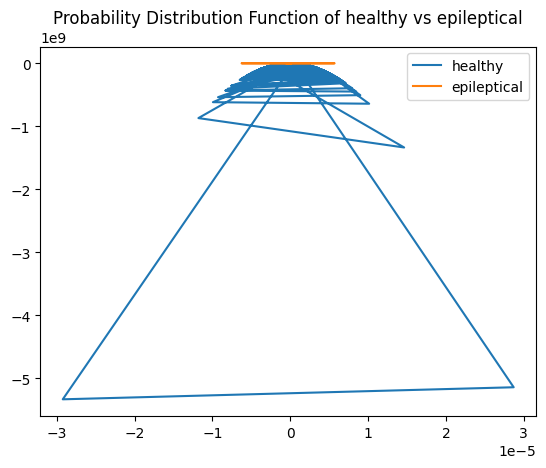

In [45]:
plt.plot(he_obs, p_h0_log, label = 'healthy')
plt.plot(epi_obs, p_h1_log, label = 'epileptical')
plt.legend()
plt.title('Probability Distribution Function of healthy vs epileptical')

In [50]:
# finding the threshold
thresh = np.median(ln_lrt)

# finding lrt of heal (h0) and epi(h1)
lrt_h1 = []
lrt_h0 = []
for i in ln_lrt:
    if i > thresh:
        lrt_h1.append(i)
    else : 
        lrt_h0.append(i)

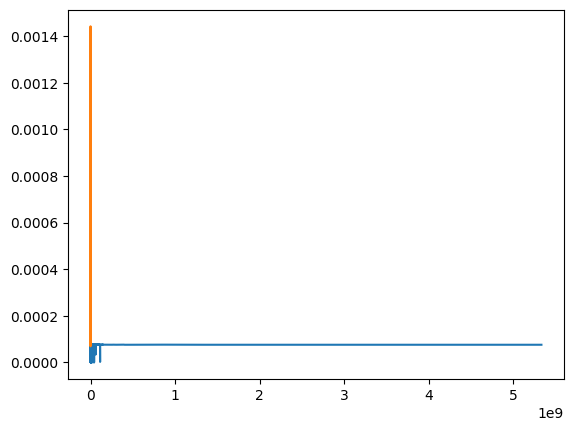

In [51]:
obs=(lrt_h1)
mean=np.mean(lrt_h1)
sigma=np.std(lrt_h1)

p_lrt_h1=(1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*((obs-mean)/sigma)**2)

obs=(lrt_h0)
mean=np.mean(lrt_h0)
sigma=np.std(lrt_h0)

p_lrt_h0=(1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*((obs-mean)/sigma)**2)

plt.plot(np.sort(lrt_h1), p_lrt_h1)
plt.plot(np.sort(lrt_h0), p_lrt_h0)

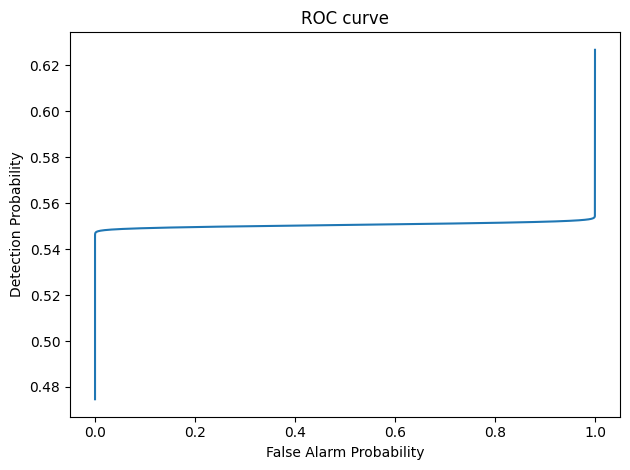

In [52]:
# plotting ROC curve
obs = (lrt_h1)
mean_pd = np.mean(lrt_h1)
sigma_pd = np.std(lrt_h1)

obs = (lrt_h0)
mean_pfa = np.mean(lrt_h0)
sigma_pfa = np.std(lrt_h0)

threshold=np.arange(-20* abs(max(lrt_h0)),20*np.abs(max(lrt_h0)), 2*np.abs(max(lrt_h0))/len(lrt_h0))
 
p_fa=[]
p_d=[]

for i in threshold:
    prob_false_alarm = 1 - norm.cdf(i, mean_pfa, sigma_pfa)
    p_fa.append(prob_false_alarm)
        
    prob_det = 1 - norm.cdf(i, mean_pd, sigma_pd)
    p_d.append(prob_det)

plt.plot(p_fa, p_d)
plt.xlabel("False Alarm Probability")
plt.ylabel("Detection Probability")
plt.title("ROC curve")
plt.tight_layout()
plt.show()

In [53]:
def auc_from_pfa_pd(pfa, pd):
    # Sort (PFA, PD) pairs by increasing PFA
    sorted_indices = np.argsort(pfa)
    sorted_pfa = np.array(pfa)[sorted_indices]
    sorted_pd = np.array(pd)[sorted_indices]
    # Interpolate the ROC curve
    roc_curve = np.trapz(sorted_pd, sorted_pfa)
    return roc_curve

# Calculate AUC
auc = auc_from_pfa_pd(p_fa, p_d)
print("AUC:", auc)

AUC: 0.5505417755755571


### Referenced Code : Shafique : Project Partner

In [ ]:
obs=np.arange(-100,100,0.1)
mean=1
sigma=1

y_h0=(1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*(obs/sigma)**2)
y_h1=(1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*((obs-mean)/sigma)**2)

In [ ]:
y_h0.shape, y_h1.shape, np.array(obs).shape

In [ ]:
y_h0_l=(-0.5*(obs/sigma)**2)
y_h1_l=(-0.5*((obs-mean)/sigma)**2)

In [ ]:
ln_lrt=y_h1_l-y_h0_l

In [ ]:
plt.plot(obs,y_h1)
plt.plot(obs,y_h0)
plt.xlim(-5,5)

In [ ]:
lrt_h1=[]
lrt_h0=[]
for i in ln_lrt:
    if i>np.log(0.5):
        lrt_h1.append(i)
        
    if i<=np.log(0.5):
        lrt_h0.append(i)

In [ ]:
plt.hist(lrt_h1)
#plt.hist(lrt_h0)

## For different mean same covariance(Here only the code will change)

In [ ]:
obs=(lrt_h1)
mean=np.mean(lrt_h1)
sigma=np.std(lrt_h1)

p_lrt_h1=(1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*((obs-mean)/sigma)**2)

obs=(lrt_h0)
mean=np.mean(lrt_h0)
sigma=np.std(lrt_h0)

p_lrt_h0=(1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*((obs-mean)/sigma)**2)

plt.plot(lrt_h1, p_lrt_h1)
plt.plot(lrt_h0, p_lrt_h0)

In [ ]:
plt.plot(lrt_h0, p_lrt_h0)

In [ ]:
obs=(lrt_h1)
mean_pd=np.mean(lrt_h1)
sigma_pd=np.std(lrt_h1)
obs=(lrt_h0)
mean_pfa=np.mean(lrt_h0)
sigma_pfa=np.std(lrt_h0)

In [ ]:
threshold=np.arange(-20*np.abs(max(lrt_h0)),20*np.abs(max(lrt_h0)),2*np.abs(max(lrt_h0))/len(lrt_h0))
p_fa=[]
p_d=[]
for i in threshold:
    prob_false_alarm=1 - norm.cdf(i, mean_pfa, sigma_pfa)
    p_fa.append(prob_false_alarm)
        
    prob_det=1 - norm.cdf(i, mean_pd, sigma_pd)
    p_d.append(prob_det)

plt.plot(p_fa, p_d)
plt.xlabel("False Alarm Probability")
plt.ylabel("Detection Probability")
plt.title("ROC curve")
plt.tight_layout()
plt.show()

In [ ]:
def auc_from_pfa_pd(pfa, pd):
    # Sort (PFA, PD) pairs by increasing PFA
    sorted_indices = np.argsort(pfa)
    sorted_pfa = np.array(pfa)[sorted_indices]
    sorted_pd = np.array(pd)[sorted_indices]
    # Interpolate the ROC curve
    roc_curve = np.trapz(sorted_pd, sorted_pfa)
    return roc_curve

# Calculate AUC
auc = auc_from_pfa_pd(p_fa, p_d)
print("AUC:", auc)